## Importing Libraries

In [266]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Loading Data

In [267]:
df_users = pd.read_csv("data/users.csv")
df_tweets = pd.read_csv("data/tweets.csv")
df_interactions = pd.read_csv("data/interactions.csv")

## Situation 1: 

### Graph Construction

In [268]:
G = nx.DiGraph()

for idx, row in df_users.iterrows():
    G.add_node(row["user_id"], 
               username=row["username"],
               account_creation_date=row["account_creation_date"],
               age=row["age"],
               country=row["country"],
               bio=row["bio"],
               followers_count=row["followers_count"])

In [269]:
def add_interaction(source, target, interaction_type):
    if G.has_edge(source, target):
        G[source][target]['weight'] += 1
        G[source][target]['types'].append(interaction_type)
    else:
        G.add_edge(source, target, weight=1, types=[interaction_type])

In [270]:
for idx, row in df_interactions.iterrows():
    tipo = row["interaction_type"]
    actor = row["user_from"]

    if tipo in ["comment", "like", "repost"]:
        tweet_id = row["tweet_id"]
        tweet_row = df_tweets[df_tweets["tweet_id"] == tweet_id]
        if not tweet_row.empty:
            tweet_creator = tweet_row.iloc[0]["creator"]
            add_interaction(actor, tweet_creator, tipo)
    elif tipo == "mention":
        destinatario = row["user_to"]
        add_interaction(actor, destinatario, tipo)

### General Insights

In [271]:
print("Total number of users (nodes):", G.number_of_nodes())
print("Total number of interactions (edges):", G.number_of_edges())

Total number of users (nodes): 15
Total number of interactions (edges): 41


In [272]:
in_degrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)
print("Top 3 users who receive the most interactions (in-degree):")
for user, deg in in_degrees[:3]:
    print(f"{user}: {deg}")

Top 3 users who receive the most interactions (in-degree):
User_3: 9
User_11: 8
User_12: 8


In [273]:
out_degrees = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)
print("Top 3 users who initiate the most interactions (out-degree):")
for user, deg in out_degrees[:3]:
    print(f"{user}: {deg}")

Top 3 users who initiate the most interactions (out-degree):
User_3: 5
User_12: 5
User_2: 4


In [274]:
betweenness = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]
print("\nTop 3 users by betweenness centrality:")
for user, cent in top_betweenness:
    print(f"{user}: {cent:.4f}")


Top 3 users by betweenness centrality:
User_3: 0.2967
User_12: 0.1190
User_14: 0.0962


### Adjacency Matrix

In [275]:
sorted_nodes = sorted(G.nodes())
adj_matrix = nx.to_numpy_array(G, nodelist=sorted_nodes)

df_adj = pd.DataFrame(adj_matrix, index=sorted_nodes, columns=sorted_nodes)
print("\nAdjacency Matrix:")
df_adj


Adjacency Matrix:


,User_1,User_10,User_11,User_12,User_13,User_14,User_15,User_2,User_3,User_4,User_5,User_6,User_7,User_8,User_9
User_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
User_10,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
User_11,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
User_12,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
User_13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
User_14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
User_15,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
User_2,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
User_3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
User_4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Graph Visualization

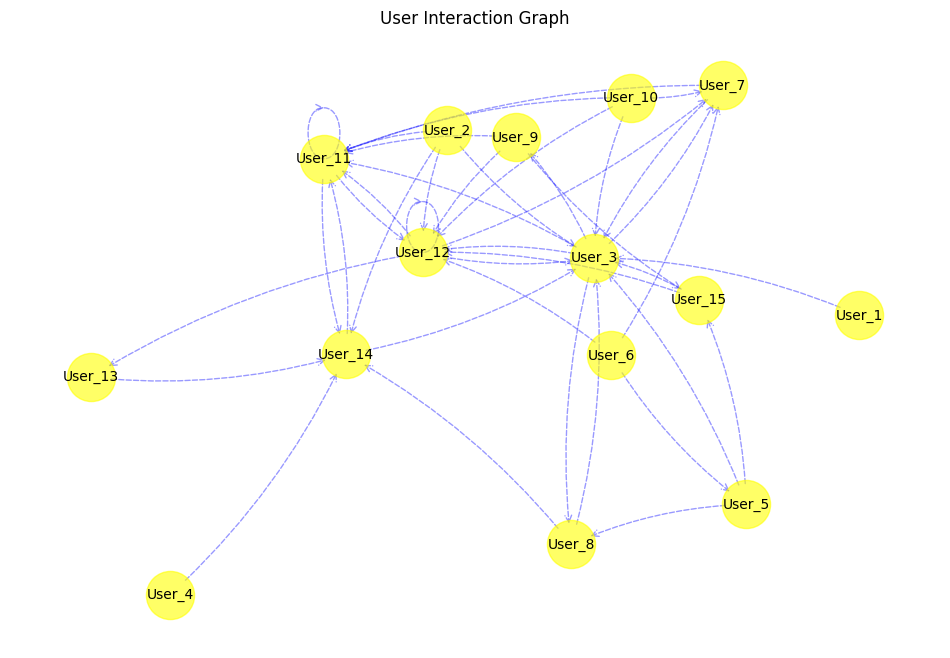

In [293]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=1200, node_color="yellow", alpha=0.6)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=12, edge_color="blue", width=1, alpha=0.4, connectionstyle="arc3,rad=0.1", min_source_margin=15, min_target_margin=15, style="dashed")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

plt.title("User Interaction Graph")
plt.axis("off")
plt.show()

## Situation 2

### Graph Construction

In [277]:
B = nx.Graph()

for idx, row in df_tweets.iterrows():
    tweet_id = row["tweet_id"]
    B.add_node(tweet_id, bipartite=0, type="tweet")
    
    hashtags_str = row["hashtags"]
    if pd.notna(hashtags_str) and hashtags_str.strip() != "":
        hashtags = [ht.strip() for ht in hashtags_str.split(",") if ht.strip() != ""]
        for ht in hashtags:
            B.add_node(ht, bipartite=1, type="hashtag")
            B.add_edge(tweet_id, ht, relation="uses")

### General Insights

In [278]:
tweet_nodes = {n for n, d in B.nodes(data=True) if d["type"] == "tweet"}
hashtag_nodes = {n for n, d in B.nodes(data=True) if d["type"] == "hashtag"}

In [279]:
degree_tweets = {node: B.degree(node) for node in tweet_nodes}
degree_hashtags = {node: B.degree(node) for node in hashtag_nodes}

print("Top 3 tweets by number of hashtags used:")
for tweet, deg in sorted(degree_tweets.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"Tweet {tweet}: {deg} connections")

print("\nTop 3 hashtags by popularity (number of tweets using it):")
for ht, deg in sorted(degree_hashtags.items(), key=lambda x: x[1], reverse=True)[:3]:
    print(f"Hashtag {ht}: {deg} connections")

Top 3 tweets by number of hashtags used:
Tweet 1004: 4 connections
Tweet 1001: 3 connections
Tweet 1002: 3 connections

Top 3 hashtags by popularity (number of tweets using it):
Hashtag #news: 7 connections
Hashtag #tech: 6 connections
Hashtag #trending: 5 connections


### Graph Visualization

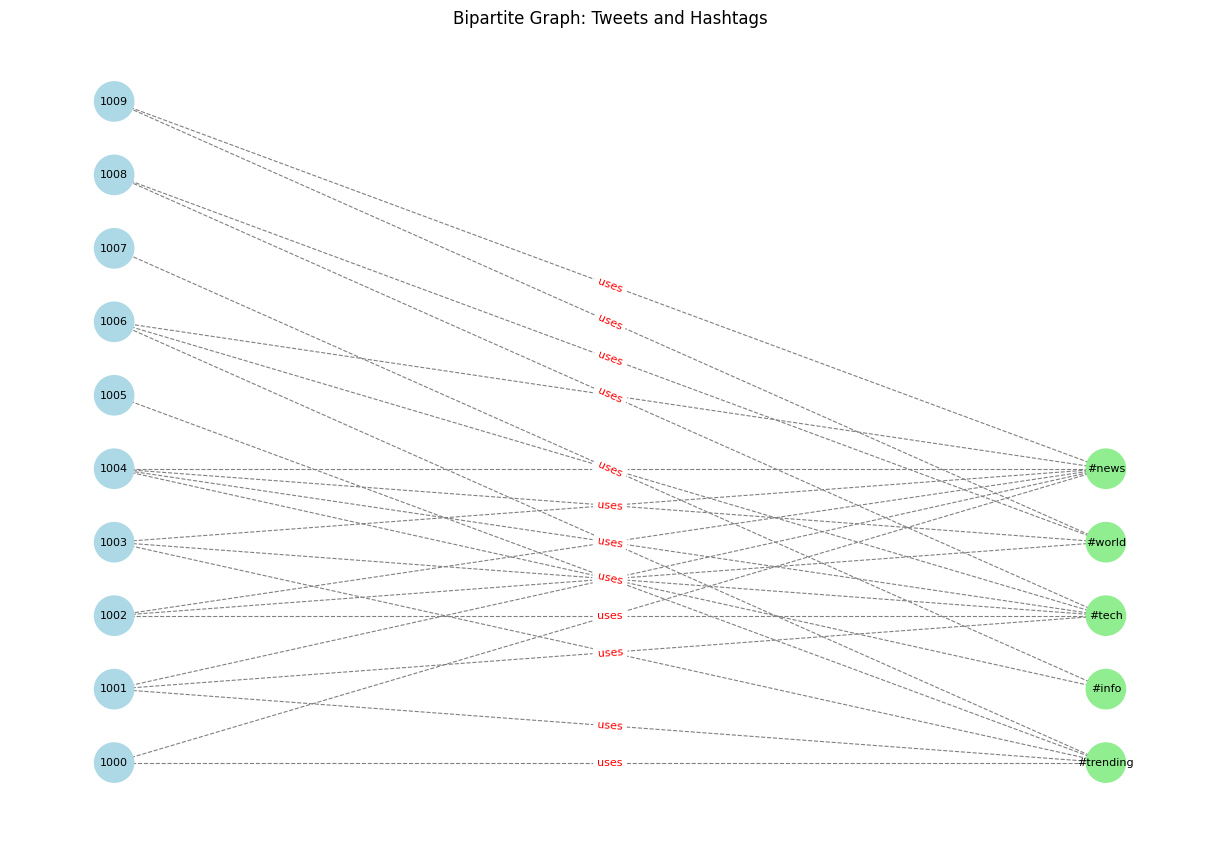

In [285]:
tweet_nodes = {n for n, d in B.nodes(data=True) if d['bipartite'] == 0}
hashtag_nodes = set(B) - tweet_nodes

pos = {}
for i, n in enumerate(tweet_nodes):
    pos[n] = (1, i)
for i, n in enumerate(hashtag_nodes):
    pos[n] = (2, i)

plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=True,
        node_color=[ "lightblue" if B.nodes[n]["type"]=="tweet" else "lightgreen" for n in B.nodes()],
        node_size=800, font_size=8, font_color="black", alpha=1, edge_color="gray", width=0.8, style="dashed")
edge_labels = nx.get_edge_attributes(B, "relation")
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels, font_color="red", font_size=8)
plt.title("Bipartite Graph: Tweets and Hashtags")
plt.axis("off")
plt.show()